In [1]:
import json
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
root_path = "./results/layer_results"

df = pd.DataFrame(
    columns=[
        "Intervention Layer",
        "Cause/Iso/Disentangle Score",
        "Type",
        "Inference Method",
    ]
)

for layer_idx in range(1, 33, 2):
    result = json.load(open(os.path.join(root_path, f"{layer_idx}.json")))
    for formal_name, inference_method in zip(
        ["Soft Intervention", "One-to-Many Intervention", "One-to-One Intervention"],
        ["default", "column_argmax", "bidding_argmax"],
    ):
        cause_score = result[inference_method]["accs"]["causal"]
        iso_score = result[inference_method]["accs"]["isolate"]
        disentangle_score = result[inference_method]["accs"]["disentangle"]

        df.loc[len(df)] = [layer_idx, cause_score, "Cause", formal_name]
        df.loc[len(df)] = [layer_idx, iso_score, "Iso", formal_name]
        df.loc[len(df)] = [layer_idx, disentangle_score, "Disentangle", formal_name]

In [8]:
MDAS_JSON = {
    ("Country", 3): {
        "disentangle": 0.43299999999999994,
        "isolate": 0.296,
        "cause": 0.57,
    },
    ("Country", 7): {
        "disentangle": 0.5700000000000001,
        "isolate": 0.42000000000000004,
        "cause": 0.72,
    },
    ("Country", 11): {"disentangle": 0.596, "isolate": 0.462, "cause": 0.73},
    ("Country", 15): {"disentangle": 0.698, "isolate": 0.576, "cause": 0.82},
    ("Country", 19): {
        "disentangle": 0.7749999999999999,
        "isolate": 0.8699999999999999,
        "cause": 0.68,
    },
    ("Country", 23): {"disentangle": 0.774, "isolate": 0.868, "cause": 0.68},
    ("Country", 27): {"disentangle": 0.601, "isolate": 0.892, "cause": 0.31},
    ("Country", 31): {
        "disentangle": 0.45499999999999996,
        "isolate": 0.9099999999999999,
        "cause": 0.0,
    },
}

In [18]:
new_df = df[df["Inference Method"] == "One-to-One Intervention"]
new_df["Inference Method"] = ["HyperDAS"] * len(new_df)

# Reset new_df index
new_df.reset_index(drop=True, inplace=True)


for key, value in MDAS_JSON.items():
    _, layer_idx = key
    print(layer_idx)
    new_df.loc[len(new_df)] = [layer_idx, value["cause"], "Cause", "MDAS"]
    new_df.loc[len(new_df)] = [layer_idx, value["isolate"], "Iso", "MDAS"]
    new_df.loc[len(new_df)] = [layer_idx, value["disentangle"], "Disentangle", "MDAS"]

new_df.reset_index(drop=True, inplace=True)

3
7
11
15
19
23
27
31


/tmp/user/24141/ipykernel_603657/1152443884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Inference Method"] = ["HyperDAS"] * len(new_df)
/tmp/user/24141/ipykernel_603657/1152443884.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = [layer_idx, value["cause"], "Cause", "MDAS"]
/tmp/user/24141/ipykernel_603657/1152443884.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

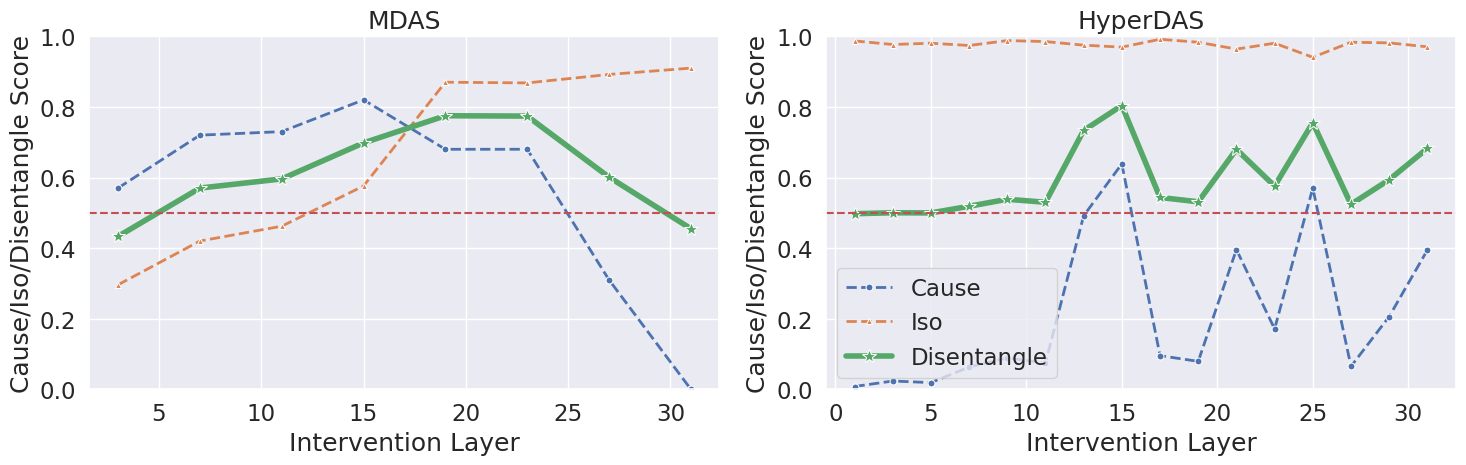

In [23]:
# Make three line plots side by side to show the Intervention Layer vs. Cause/Iso/Disentangle Score for each inference method, use different colors for each type
# Add different markers for each type
# move the legend to the right of the last plot and remove the title of the legend
import itertools

sns.set(font_scale=1.5)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

marker = itertools.cycle(["o", "^", "*", "8", "s", "p", "d", "v"])
markers = [next(marker) for _ in range(3)]

for i, inference_method in enumerate(["MDAS", "HyperDAS"]):
    for j, (type_name, marker) in enumerate(
        zip(["Cause", "Iso", "Disentangle"], markers)
    ):
        style = "solid" if type_name == "Disentangle" else "dashed"
        width = 4 if type_name == "Disentangle" else 2
        marker_size = 10 if type_name == "Disentangle" else 5
        df_subset = new_df[
            (new_df["Inference Method"] == inference_method)
            & (new_df["Type"] == type_name)
        ]
        sns.lineplot(
            x="Intervention Layer",
            y="Cause/Iso/Disentangle Score",
            data=df_subset,
            ax=axes[i],
            label=type_name,
            marker=marker,
            linestyle=style,
            linewidth=width,
            markersize=marker_size,
        )
    axes[i].set_title(inference_method)
    axes[i].set_ylim(0, 1)
    axes[i].set_xlabel("Intervention Layer")
    axes[i].set_ylabel("Cause/Iso/Disentangle Score")

    # Draw a horizontal line at y=0.5 for each plot
    axes[i].axhline(y=0.5, color="r", linestyle="--")


# Move the legend to the up right of the last plot and remove the title of the legend
axes[0].legend(loc="lower left", title=None)

# Remove the legend in the first two plots
axes[1].get_legend().remove()

plt.tight_layout()

plt.savefig("layer_results_two.pdf")

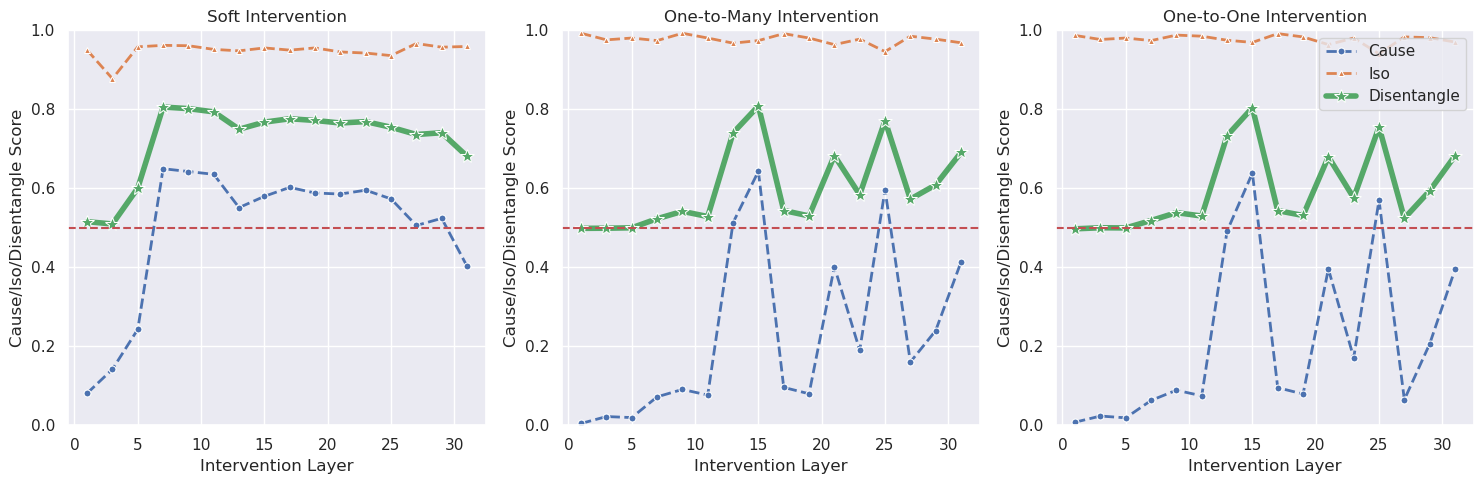

In [3]:
# Make three line plots side by side to show the Intervention Layer vs. Cause/Iso/Disentangle Score for each inference method, use different colors for each type
# Add different markers for each type
# move the legend to the right of the last plot and remove the title of the legend
import itertools

sns.set()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

marker = itertools.cycle(["o", "^", "*", "8", "s", "p", "d", "v"])
markers = [next(marker) for _ in range(3)]

for i, inference_method in enumerate(
    ["Soft Intervention", "One-to-Many Intervention", "One-to-One Intervention"]
):
    for j, (type_name, marker) in enumerate(
        zip(["Cause", "Iso", "Disentangle"], markers)
    ):
        style = "solid" if type_name == "Disentangle" else "dashed"
        width = 4 if type_name == "Disentangle" else 2
        marker_size = 10 if type_name == "Disentangle" else 5
        df_subset = df[
            (df["Inference Method"] == inference_method) & (df["Type"] == type_name)
        ]
        sns.lineplot(
            x="Intervention Layer",
            y="Cause/Iso/Disentangle Score",
            data=df_subset,
            ax=axes[i],
            label=type_name,
            marker=marker,
            linestyle=style,
            linewidth=width,
            markersize=marker_size,
        )
    axes[i].set_title(inference_method)
    axes[i].set_ylim(0, 1)
    axes[i].set_xlabel("Intervention Layer")
    axes[i].set_ylabel("Cause/Iso/Disentangle Score")

    # Draw a horizontal line at y=0.5 for each plot
    axes[i].axhline(y=0.5, color="r", linestyle="--")


# Move the legend to the up right of the last plot and remove the title of the legend
axes[2].legend(loc="upper right", title=None)

# Remove the legend in the first two plots
axes[0].get_legend().remove()
axes[1].get_legend().remove()

plt.tight_layout()

plt.savefig("layer_results.pdf")